In [1]:
# imports and load data
import pandas as pd
% matplotlib inline

df = pd.read_csv('store_data.csv')

df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [2]:
# explore data
df.shape

(200, 6)

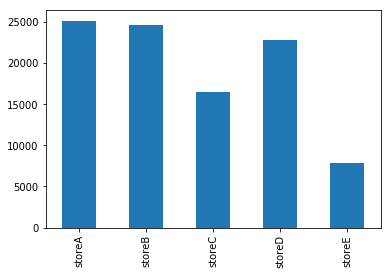

In [8]:
# sales for the last month
# Which store has the highest total sales for the last month?
# c.f. https://stackoverflow.com/questions/32105817/plot-entire-row-on-pandas/32105953#32105953
from datetime import datetime, timedelta
max_week = max(df["week"])

d = datetime.strptime(max_week, '%Y-%m-%d')
dstart = d - timedelta(weeks=4)
start_month_of_max_week = dstart.strftime('%Y-%m-%d')

df_last_mo = df[(df['week'] > start_month_of_max_week) & (df['week'] <= max_week)]
series_last_mo_summed = df_last_mo.loc[:,'storeA':'storeE'].sum()
series_last_mo_summed.plot(kind='bar');

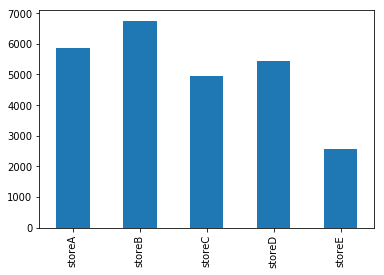

In [10]:
# average sales
# Which store makes the most sales on average?
series_each_store_summed = df.loc[:,'storeA':'storeE'].mean()
series_each_store_summed.plot(kind='bar');


In [11]:
# sales for the week of March 13th, 2016
# Which store sells the most during the week of March 13th, 2016?
df_target_week = df[(df['week'] == '2016-03-13')]
df_target_week

,week,storeA,storeB,storeC,storeD,storeE
97,2016-03-13,2054,1390,5112,5513,2536


In [13]:
df_target_week_stores = df_target_week.loc[:,'storeA':'storeE']
df_target_week_stores

,storeA,storeB,storeC,storeD,storeE
97,2054,1390,5112,5513,2536


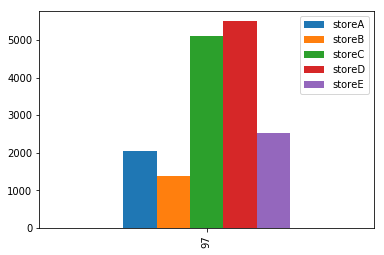

In [14]:
# plot default bar, but x-axis shows index :-(
df_target_week_stores.plot(kind='bar');

In [38]:
# playing around w/ selection from that df...

# this is a single row df
print(df_target_week_stores)

# these all produce a series from that row
df_target_week_stores.loc[97]
df_target_week_stores.iloc[0]
df_target_week_stores.squeeze()

# this is the same df again
#df_target_week_stores.loc[:]

# checking out rows/columns
print('\nrow labels: {}'.format(df_target_week_stores.index))
print('\ncolumn labels: {}'.format(df_target_week_stores.columns))

    storeA  storeB  storeC  storeD  storeE
97    2054    1390    5112    5513    2536

row labels: Int64Index([97], dtype='int64')

column labels: Index(['storeA', 'storeB', 'storeC', 'storeD', 'storeE'], dtype='object')


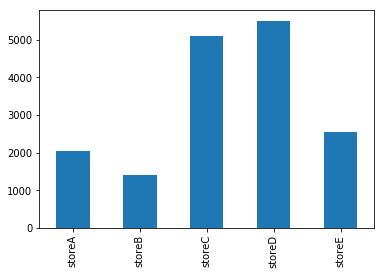

In [15]:
# ok can convert it to a series and plot that

series_target_week_stores_series = df_target_week_stores.squeeze()
series_target_week_stores_series.plot(kind='bar');

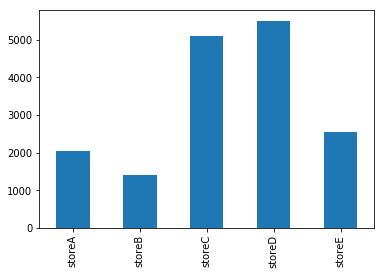

In [43]:
# try to exchange rows/columns and plot that
df_target_week_stores.T.plot(kind='bar', legend=None);
# w00t!

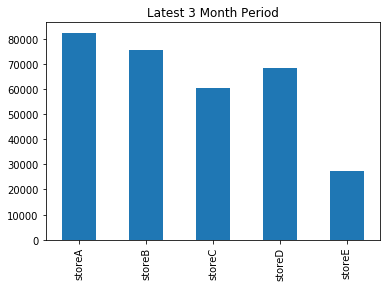

In [61]:
# sales for the lastest 3-month periods
# Which store has the most sales in the latest 3-month period?
dstart_3mo = d - timedelta(weeks=3*4)
dstart_3mo_week = dstart_3mo.strftime('%Y-%m-%d')
#print(dstart_3mo_week)

df_3mo = df[(df['week'] > dstart_3mo_week) & (df['week'] <= max_week)]
#print(df_3mo.head())
df_3mo_summed = df_3mo.loc[:,'storeA':'storeE'].sum()
#print(df_3mo_summed)
df_3mo_summed.plot(kind='bar', title='Latest 3 Month Period');